In [38]:
# 협업 필터링에는 2가지가 있음

# 1. 고객별 개개인 추천시스템 (사용자 추천 서비스)
# 2. 일반적으로 관련된 상품 추천 (아이템 추천 서비스)

In [39]:
# 고객을 전부 넣어야 하는 이유

# 고객이 상품을 하나만 구매할 때 해당 상품이 더 많이 등장한다는 사실로부터 우리는 다음과 같은 정보를 얻을 수 있습니다.

# 상품의 인기도: 해당 상품이 다른 상품들보다 인기가 높다면, 고객이 단 하나의 상품을 구매할 때에도 해당 상품이 더 많이 등장할 가능성이 높아집니다. 
# 이는 해당 상품이 고객들에게 매력적인 제품이라는 증거가 됩니다.

# 고객의 취향: 고객이 단 하나의 상품을 선택할 때 해당 상품이 다른 상품들보다 더 많이 등장한다면,
# 이는 해당 상품이 고객의 취향에 맞는 제품이라는 증거가 됩니다. 이를 통해 상품을 더욱 정확하게 타겟팅하여 마케팅 전략을 수립할 수 있습니다.

########
# 크로스셀링 기회: 단 하나의 상품만을 구매하는 고객에게 해당 상품과 관련된 다른 상품들을 제안함으로써 추가적인 구매 기회를 창출할 수 있습니다.  
# 예를 들어, 만약 해당 상품이 어떤 다른 제품과 함께 사용하는 것이 일반적이라면, 해당 제품과 함께 구매할 만한 크로스셀링 기회가 있을 수 있습니다.

In [40]:
# 한 개만 구매하는 고객을 빼는 경우

# 한 개만 구매하는 고객을 빼고 연관분석을 수행하는 경우는 "단일 구매자 분석"이라고도 불리며, 이 경우 다음과 같은 정보를 얻을 수 있습니다.

# 상품 번들링 기회: 연관분석을 통해 다른 고객들이 함께 구매하는 상품들을 파악함으로써, 해당 상품과 함께 구매되는 다른 상품들을 제안할 수 있습니다. 
# 이를 통해 상품 번들링 기회를 찾아내어 매출을 높일 수 있습니다.

# 상품 포지셔닝: 연관분석 결과를 통해 어떤 상품들이 함께 구매되는지 파악함으로써, 해당 상품의 위치와 경쟁 업체와의 차별화 전략을 수립할 수 있습니다.

# 상품 품질 개선: 연관분석을 통해 함께 구매되는 상품들 중에 불만족스러운 상품이 있다면, 해당 상품의 품질을 개선하여 고객 만족도를 높일 수 있습니다.

# 고객 세분화: 단일 구매자 분석을 통해 한 개만 구매하는 고객들의 구매 패턴을 파악할 수 있습니다. 
# 이를 기반으로 고객을 세분화하여 타겟팅을 더욱 정확하게 할 수 있습니다.

In [41]:
# 1개짜리도 포함시킨 이유

# 만약, 여러 번 구매하지만 상품 하나만 구매하는 경우가 다른 고객들과 함께 구매하는 상품들의 교집합이 크다면,
# 들을 제외하면 추천시스템이 불완전해질 수 있습니다. 따라서, 이러한 경우에는 여러 번 구매하지만 상품 하나만 구매하는 경우도 모델에 포함시켜야 합니다.

# 다른 고객들과 함께 구매하는 상품들의 교집합이 크다: 여러 번 구매하지만 상품 하나만 구매하는 경우가 다른 고객들과 함께 구매하는 상품들이 많이 겹친다


# 그러나, 여러 번 구매하지만 상품 하나만 구매하는 경우가 다른 고객들과 함께 구매하는 상품들의 교집합이 작거나 없는 경우에는 
# 이들을 모델에서 제외시켜도 괜찮습니다. 이러한 경우에는 다른 고객들과 구매 패턴이 다르기 때문에,
# 이들의 데이터를 모델에 포함시키면 노이즈로 작용하여 추천 정확도를 떨어뜨릴 수 있습니다.

In [1]:
import pandas as pd
import numpy as np 
import matplotlib
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')
matplotlib.rc("font",family = "NaNumGothic")
matplotlib.rc("axes",unicode_minus = False) # 음수표시 

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules


# 중분류물품

In [43]:
df= pd.read_csv("/home/piai/강의파일/프로젝트/구매상품데이터프레임(중분류물품명).csv",index_col=0)

In [44]:
df

,0
0,논지엠오유정란
1,세안비누$세안비누$치약/칫솔
2,치약/칫솔$위생용품
3,추출/농축액
4,프리믹스
...,...
189363,논지엠오유정란$오이$파프리카$파프리카$기타양념$포도(혼합포도)$기타양념
189364,콩$건대추$화본
189365,콩
189366,양파$기름$깐마늘$당근$우유/산양유$중파$어묵$간장


In [45]:
# df 학습
records = []
for i in range(len(df)):
    records.append([str(df.values[i,j]) \
                    for j in range(len(df.columns)) if not pd.isna(df.values[i,j])])


In [46]:
# 모델링
te = TransactionEncoder()
te_ary = te.fit(records).transform(records, sparse=True)
te_df = pd.DataFrame.sparse.from_spmatrix(te_ary, columns=te.columns_)


In [47]:
frequent_itemset = apriori(te_df,
                           min_support=0.005, 
                           max_len=3, 
                           use_colnames=True, 
                           verbose=1 
                          )
frequent_itemset['length'] = frequent_itemset['itemsets'].map(lambda x: len(x))
frequent_itemset.sort_values('support',ascending=False,inplace=True)



Processing 42 combinations | Sampling itemset size 2


In [48]:
association_rules_df = association_rules(frequent_itemset, 
                                         metric='confidence', 
                                         min_threshold=0.005,
                                        )
all_confidences = []
collective_strengths = []
cosine_similarities = []
for _,row in association_rules_df.iterrows():
    all_confidence_if = list(row['antecedents'])[0]
    all_confidence_then = list(row['consequents'])[0]
    if row['antecedent support'] <= row['consequent support']:
        all_confidence_if = list(row['consequents'])[0]
        all_confidence_then = list(row['antecedents'])[0]
    all_confidence = {all_confidence_if+' => '+all_confidence_then : \
                      row['support']/max(row['antecedent support'], row['consequent support'])}
    all_confidences.append(all_confidence)
    
    violation = row['antecedent support'] + row['consequent support'] - 2*row['support']
    ex_violation = 1-row['antecedent support']*row['consequent support'] - \
                    (1-row['antecedent support'])*(1-row['consequent support'])
    if violation == 0 or ex_violation == 0:
        collective_strength = 0
    else:
        collective_strength = (1-violation)/(1-ex_violation)*(ex_violation/violation+1)+1
    collective_strengths.append(collective_strength)
    
    cosine_similarity = row['support']/np.sqrt(row['antecedent support']*row['consequent support'])
    cosine_similarities.append(cosine_similarity)
    
association_rules_df['all-confidence'] = all_confidences
association_rules_df['collective strength'] = collective_strengths
association_rules_df['cosine similarity'] = cosine_similarities

In [49]:
association_rules_df.sort_values(by='lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,all-confidence,collective strength,cosine similarity


In [50]:
df_association = association_rules_df.sort_values(by='lift',ascending=False)

In [51]:
df_association.to_csv('연관규칙(중분류물품명).csv')

In [52]:
#시각화

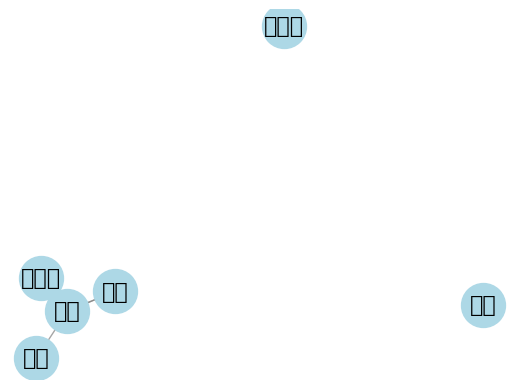

In [53]:
import networkx as nx
import matplotlib.pyplot as plt
matplotlib.rc("font",family = "NaNumGothic")
matplotlib.rc("axes",unicode_minus = False) # 음수표시 

# 연관 규칙 그래프 생성
G = nx.DiGraph()

# 노드 추가
G.add_nodes_from(['과즙', '스낵', '김가공', '식빵', '두부', '즉석떡'])

# 엣지 추가
G.add_edge('과즙', '스낵')
G.add_edge('스낵', '과즙')
G.add_edge('김가공', '스낵')
G.add_edge('스낵', '김가공')
G.add_edge('스낵', '식빵')
# ... 엣지 추가 ...

# 노드 그리기
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=1000)

# 엣지 그리기
nx.draw_networkx_edges(G, pos, width=1, alpha=0.7, arrows=True, edge_color='gray')

# 노드 라벨 그리기
nx.draw_networkx_labels(G, pos, font_size=16, font_family='sans-serif')

# 그래프 출력
plt.axis('off')
plt.show()

In [54]:
# RandomSearch 최적의 파라미터 불가. 파라미터 조정을 도메인 바탕으로

# 남자만

In [55]:
df= pd.read_csv("/home/piai/강의파일/프로젝트/구매상품데이터프레임(물품명)남자.csv",index_col=0)

records = []
for i in range(len(df)):
    records.append([str(df.values[i,j]) \
                    for j in range(len(df.columns)) if not pd.isna(df.values[i,j])])


te = TransactionEncoder()
te_ary = te.fit(records).transform(records, sparse=True)
te_df = pd.DataFrame.sparse.from_spmatrix(te_ary, columns=te.columns_)


frequent_itemset = apriori(te_df,
                           min_support=0.005, 
                           max_len=3, 
                           use_colnames=True, 
                           verbose=1 
                          )
frequent_itemset['length'] = frequent_itemset['itemsets'].map(lambda x: len(x))
frequent_itemset.sort_values('support',ascending=False,inplace=True)


association_rules_df = association_rules(frequent_itemset, 
                                         metric='confidence', 
                                         min_threshold=0.005,
                                        )
all_confidences = []
collective_strengths = []
cosine_similarities = []
for _,row in association_rules_df.iterrows():
    all_confidence_if = list(row['antecedents'])[0]
    all_confidence_then = list(row['consequents'])[0]
    if row['antecedent support'] <= row['consequent support']:
        all_confidence_if = list(row['consequents'])[0]
        all_confidence_then = list(row['antecedents'])[0]
    all_confidence = {all_confidence_if+' => '+all_confidence_then : \
                      row['support']/max(row['antecedent support'], row['consequent support'])}
    all_confidences.append(all_confidence)
    
    violation = row['antecedent support'] + row['consequent support'] - 2*row['support']
    ex_violation = 1-row['antecedent support']*row['consequent support'] - \
                    (1-row['antecedent support'])*(1-row['consequent support'])
    if violation == 0 or ex_violation == 0:
        collective_strength = 0
    else:
        collective_strength = (1-violation)/(1-ex_violation)*(ex_violation/violation+1)+1
    collective_strengths.append(collective_strength)
    
    cosine_similarity = row['support']/np.sqrt(row['antecedent support']*row['consequent support'])
    cosine_similarities.append(cosine_similarity)
    
association_rules_df['all-confidence'] = all_confidences
association_rules_df['collective strength'] = collective_strengths
association_rules_df['cosine similarity'] = cosine_similarities

df_association = association_rules_df.sort_values(by='lift',ascending=False)

df_association

df_association.to_csv('연관규칙(물품명)남자.csv')

Processing 78 combinations | Sampling itemset size 3e 2


# 물품명

In [56]:
df= pd.read_csv("/home/piai/강의파일/프로젝트/구매상품데이터프레임(물품명).csv",index_col=0)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,유정란/친환경,통밀식빵,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,키토산비누,키토산비누,물사랑치약,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,물사랑치약,면생리대,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,흑염소진액,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,곡물쿠키믹스,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
df= pd.read_csv("/home/piai/강의파일/프로젝트/구매상품데이터프레임(물품명).csv",index_col=0)

records = []
for i in range(len(df)):
    records.append([str(df.values[i,j]) \
                    for j in range(len(df.columns)) if not pd.isna(df.values[i,j])])


te = TransactionEncoder()
te_ary = te.fit(records).transform(records, sparse=True)
te_df = pd.DataFrame.sparse.from_spmatrix(te_ary, columns=te.columns_)


frequent_itemset = apriori(te_df,
                           min_support=0.005, 
                           max_len=3, 
                           use_colnames=True, 
                           verbose=1 
                          )
frequent_itemset['length'] = frequent_itemset['itemsets'].map(lambda x: len(x))
frequent_itemset.sort_values('support',ascending=False,inplace=True)


association_rules_df = association_rules(frequent_itemset, 
                                         metric='confidence', 
                                         min_threshold=0.005,
                                        )
all_confidences = []
collective_strengths = []
cosine_similarities = []
for _,row in association_rules_df.iterrows():
    all_confidence_if = list(row['antecedents'])[0]
    all_confidence_then = list(row['consequents'])[0]
    if row['antecedent support'] <= row['consequent support']:
        all_confidence_if = list(row['consequents'])[0]
        all_confidence_then = list(row['antecedents'])[0]
    all_confidence = {all_confidence_if+' => '+all_confidence_then : \
                      row['support']/max(row['antecedent support'], row['consequent support'])}
    all_confidences.append(all_confidence)
    
    violation = row['antecedent support'] + row['consequent support'] - 2*row['support']
    ex_violation = 1-row['antecedent support']*row['consequent support'] - \
                    (1-row['antecedent support'])*(1-row['consequent support'])
    if violation == 0 or ex_violation == 0:
        collective_strength = 0
    else:
        collective_strength = (1-violation)/(1-ex_violation)*(ex_violation/violation+1)+1
    collective_strengths.append(collective_strength)
    
    cosine_similarity = row['support']/np.sqrt(row['antecedent support']*row['consequent support'])
    cosine_similarities.append(cosine_similarity)
    
association_rules_df['all-confidence'] = all_confidences
association_rules_df['collective strength'] = collective_strengths
association_rules_df['cosine similarity'] = cosine_similarities

df_association = association_rules_df.sort_values(by='lift',ascending=False)

df_association

df_association.to_csv('연관규칙(물품명).csv')

Processing 78 combinations | Sampling itemset size 3e 2


# 연령별

In [10]:
df= pd.read_csv("/home/piai/강의파일/프로젝트/구매상품데이터프레임(물품명) 20대.csv",index_col=0)

records = []
for i in range(len(df)):
    records.append([str(df.values[i,j]) \
                    for j in range(len(df.columns)) if not pd.isna(df.values[i,j])])


te = TransactionEncoder()
te_ary = te.fit(records).transform(records, sparse=True)
te_df = pd.DataFrame.sparse.from_spmatrix(te_ary, columns=te.columns_)


frequent_itemset = apriori(te_df,
                           min_support=0.005, 
                           max_len=3, 
                           use_colnames=True, 
                           verbose=1 
                          )
frequent_itemset['length'] = frequent_itemset['itemsets'].map(lambda x: len(x))
frequent_itemset.sort_values('support',ascending=False,inplace=True)


association_rules_df = association_rules(frequent_itemset, 
                                         metric='confidence', 
                                         min_threshold=0.005,
                                        )
all_confidences = []
collective_strengths = []
cosine_similarities = []
for _,row in association_rules_df.iterrows():
    all_confidence_if = list(row['antecedents'])[0]
    all_confidence_then = list(row['consequents'])[0]
    if row['antecedent support'] <= row['consequent support']:
        all_confidence_if = list(row['consequents'])[0]
        all_confidence_then = list(row['antecedents'])[0]
    all_confidence = {all_confidence_if+' => '+all_confidence_then : \
                      row['support']/max(row['antecedent support'], row['consequent support'])}
    all_confidences.append(all_confidence)
    
    violation = row['antecedent support'] + row['consequent support'] - 2*row['support']
    ex_violation = 1-row['antecedent support']*row['consequent support'] - \
                    (1-row['antecedent support'])*(1-row['consequent support'])
    if violation == 0 or ex_violation == 0:
        collective_strength = 0
    else:
        collective_strength = (1-violation)/(1-ex_violation)*(ex_violation/violation+1)+1
    collective_strengths.append(collective_strength)
    
    cosine_similarity = row['support']/np.sqrt(row['antecedent support']*row['consequent support'])
    cosine_similarities.append(cosine_similarity)
    
association_rules_df['all-confidence'] = all_confidences
association_rules_df['collective strength'] = collective_strengths
association_rules_df['cosine similarity'] = cosine_similarities

df_association = association_rules_df.sort_values(by='lift',ascending=False)
df_association

df_association.to_csv('연관규칙(물품명) 20대.csv')

Processing 22952 combinations | Sampling itemset size 2


In [9]:
df= pd.read_csv("/home/piai/강의파일/프로젝트/구매상품데이터프레임(물품명) 20대.csv",index_col=0)

records = []
for i in range(len(df)):
    records.append([str(df.values[i,j]) \
                    for j in range(len(df.columns)) if not pd.isna(df.values[i,j])])


te = TransactionEncoder()
te_ary = te.fit(records).transform(records, sparse=True)
te_df = pd.DataFrame.sparse.from_spmatrix(te_ary, columns=te.columns_)

frequent_itemset = apriori(te_df,
                           min_support=0.005, 
                           max_len=3, 
                           use_colnames=True, 
                           verbose=1 
                          )
frequent_itemset['length'] = frequent_itemset['itemsets'].map(lambda x: len(x))
frequent_itemset.sort_values('support',ascending=False,inplace=True)


association_rules_df = association_rules(frequent_itemset, 
                                         metric='confidence', 
                                         min_threshold=0.005,
                                        )
all_confidences = []
collective_strengths = []
cosine_similarities = []
for _,row in association_rules_df.iterrows():
    all_confidence_if = list(row['antecedents'])[0]
    all_confidence_then = list(row['consequents'])[0]
    if row['antecedent support'] <= row['consequent support']:
        all_confidence_if = list(row['consequents'])[0]
        all_confidence_then = list(row['antecedents'])[0]
    all_confidence = {all_confidence_if+' => '+all_confidence_then : \
                      row['support']/max(row['antecedent support'], row['consequent support'])}
    all_confidences.append(all_confidence)
    
    violation = row['antecedent support'] + row['consequent support'] - 2*row['support']
    ex_violation = 1-row['antecedent support']*row['consequent support'] - \
                    (1-row['antecedent support'])*(1-row['consequent support'])
    if violation == 0 or ex_violation == 0:
        collective_strength = 0
    else:
        collective_strength = (1-violation)/(1-ex_violation)*(ex_violation/violation+1)+1
    collective_strengths.append(collective_strength)
    
    cosine_similarity = row['support']/np.sqrt(row['antecedent support']*row['consequent support'])
    cosine_similarities.append(cosine_similarity)
    
association_rules_df['all-confidence'] = all_confidences
association_rules_df['collective strength'] = collective_strengths
association_rules_df['cosine similarity'] = cosine_similarities

df_association = association_rules_df.sort_values(by='lift',ascending=False)


df_association

df_association.to_csv('연관규칙(물품명) 20대.csv')

Processing 22952 combinations | Sampling itemset size 2


In [5]:
df= pd.read_csv("/home/piai/강의파일/프로젝트/구매상품데이터프레임(물품명) 30대.csv",index_col=0)

records = []
for i in range(len(df)):
    records.append([str(df.values[i,j]) \
                    for j in range(len(df.columns)) if not pd.isna(df.values[i,j])])


te = TransactionEncoder()
te_ary = te.fit(records).transform(records, sparse=True)
te_df = pd.DataFrame.sparse.from_spmatrix(te_ary, columns=te.columns_)


frequent_itemset = apriori(te_df,
                           min_support=0.005, 
                           max_len=3, 
                           use_colnames=True, 
                           verbose=1 
                          )
frequent_itemset['length'] = frequent_itemset['itemsets'].map(lambda x: len(x))
frequent_itemset.sort_values('support',ascending=False,inplace=True)


association_rules_df = association_rules(frequent_itemset, 
                                         metric='confidence', 
                                         min_threshold=0.005,
                                        )
all_confidences = []
collective_strengths = []
cosine_similarities = []
for _,row in association_rules_df.iterrows():
    all_confidence_if = list(row['antecedents'])[0]
    all_confidence_then = list(row['consequents'])[0]
    if row['antecedent support'] <= row['consequent support']:
        all_confidence_if = list(row['consequents'])[0]
        all_confidence_then = list(row['antecedents'])[0]
    all_confidence = {all_confidence_if+' => '+all_confidence_then : \
                      row['support']/max(row['antecedent support'], row['consequent support'])}
    all_confidences.append(all_confidence)
    
    violation = row['antecedent support'] + row['consequent support'] - 2*row['support']
    ex_violation = 1-row['antecedent support']*row['consequent support'] - \
                    (1-row['antecedent support'])*(1-row['consequent support'])
    if violation == 0 or ex_violation == 0:
        collective_strength = 0
    else:
        collective_strength = (1-violation)/(1-ex_violation)*(ex_violation/violation+1)+1
    collective_strengths.append(collective_strength)
    
    cosine_similarity = row['support']/np.sqrt(row['antecedent support']*row['consequent support'])
    cosine_similarities.append(cosine_similarity)
    
association_rules_df['all-confidence'] = all_confidences
association_rules_df['collective strength'] = collective_strengths
association_rules_df['cosine similarity'] = cosine_similarities

df_association = association_rules_df.sort_values(by='lift',ascending=False)
df_association

df_association.to_csv('연관규칙(물품명) 30대.csv')

Processing 273 combinations | Sampling itemset size 32


In [6]:
df= pd.read_csv("/home/piai/강의파일/프로젝트/구매상품데이터프레임(물품명) 40대.csv",index_col=0)

records = []
for i in range(len(df)):
    records.append([str(df.values[i,j]) \
                    for j in range(len(df.columns)) if not pd.isna(df.values[i,j])])


te = TransactionEncoder()
te_ary = te.fit(records).transform(records, sparse=True)
te_df = pd.DataFrame.sparse.from_spmatrix(te_ary, columns=te.columns_)


frequent_itemset = apriori(te_df,
                           min_support=0.005, 
                           max_len=3, 
                           use_colnames=True, 
                           verbose=1 
                          )
frequent_itemset['length'] = frequent_itemset['itemsets'].map(lambda x: len(x))
frequent_itemset.sort_values('support',ascending=False,inplace=True)


association_rules_df = association_rules(frequent_itemset, 
                                         metric='confidence', 
                                         min_threshold=0.005,
                                        )
all_confidences = []
collective_strengths = []
cosine_similarities = []
for _,row in association_rules_df.iterrows():
    all_confidence_if = list(row['antecedents'])[0]
    all_confidence_then = list(row['consequents'])[0]
    if row['antecedent support'] <= row['consequent support']:
        all_confidence_if = list(row['consequents'])[0]
        all_confidence_then = list(row['antecedents'])[0]
    all_confidence = {all_confidence_if+' => '+all_confidence_then : \
                      row['support']/max(row['antecedent support'], row['consequent support'])}
    all_confidences.append(all_confidence)
    
    violation = row['antecedent support'] + row['consequent support'] - 2*row['support']
    ex_violation = 1-row['antecedent support']*row['consequent support'] - \
                    (1-row['antecedent support'])*(1-row['consequent support'])
    if violation == 0 or ex_violation == 0:
        collective_strength = 0
    else:
        collective_strength = (1-violation)/(1-ex_violation)*(ex_violation/violation+1)+1
    collective_strengths.append(collective_strength)
    
    cosine_similarity = row['support']/np.sqrt(row['antecedent support']*row['consequent support'])
    cosine_similarities.append(cosine_similarity)
    
association_rules_df['all-confidence'] = all_confidences
association_rules_df['collective strength'] = collective_strengths
association_rules_df['cosine similarity'] = cosine_similarities

df_association = association_rules_df.sort_values(by='lift',ascending=False)
df_association

df_association.to_csv('연관규칙(물품명) 40대.csv')


Processing 2450 combinations | Sampling itemset size 2
Processing 366 combinations | Sampling itemset size 3


In [7]:
df= pd.read_csv("/home/piai/강의파일/프로젝트/구매상품데이터프레임(물품명) 50대.csv",index_col=0)

records = []
for i in range(len(df)):
    records.append([str(df.values[i,j]) \
                    for j in range(len(df.columns)) if not pd.isna(df.values[i,j])])


te = TransactionEncoder()
te_ary = te.fit(records).transform(records, sparse=True)
te_df = pd.DataFrame.sparse.from_spmatrix(te_ary, columns=te.columns_)


frequent_itemset = apriori(te_df,
                           min_support=0.005, 
                           max_len=3, 
                           use_colnames=True, 
                           verbose=1 
                          )
frequent_itemset['length'] = frequent_itemset['itemsets'].map(lambda x: len(x))
frequent_itemset.sort_values('support',ascending=False,inplace=True)


association_rules_df = association_rules(frequent_itemset, 
                                         metric='confidence', 
                                         min_threshold=0.005,
                                        )
all_confidences = []
collective_strengths = []
cosine_similarities = []
for _,row in association_rules_df.iterrows():
    all_confidence_if = list(row['antecedents'])[0]
    all_confidence_then = list(row['consequents'])[0]
    if row['antecedent support'] <= row['consequent support']:
        all_confidence_if = list(row['consequents'])[0]
        all_confidence_then = list(row['antecedents'])[0]
    all_confidence = {all_confidence_if+' => '+all_confidence_then : \
                      row['support']/max(row['antecedent support'], row['consequent support'])}
    all_confidences.append(all_confidence)
    
    violation = row['antecedent support'] + row['consequent support'] - 2*row['support']
    ex_violation = 1-row['antecedent support']*row['consequent support'] - \
                    (1-row['antecedent support'])*(1-row['consequent support'])
    if violation == 0 or ex_violation == 0:
        collective_strength = 0
    else:
        collective_strength = (1-violation)/(1-ex_violation)*(ex_violation/violation+1)+1
    collective_strengths.append(collective_strength)
    
    cosine_similarity = row['support']/np.sqrt(row['antecedent support']*row['consequent support'])
    cosine_similarities.append(cosine_similarity)
    
association_rules_df['all-confidence'] = all_confidences
association_rules_df['collective strength'] = collective_strengths
association_rules_df['cosine similarity'] = cosine_similarities

df_association = association_rules_df.sort_values(by='lift',ascending=False)
df_association

df_association.to_csv('연관규칙(물품명) 50대.csv')


Processing 2450 combinations | Sampling itemset size 2
Processing 597 combinations | Sampling itemset size 3


In [8]:
df= pd.read_csv("/home/piai/강의파일/프로젝트/구매상품데이터프레임(물품명) 60대 이상.csv",index_col=0)

records = []
for i in range(len(df)):
    records.append([str(df.values[i,j]) \
                    for j in range(len(df.columns)) if not pd.isna(df.values[i,j])])


te = TransactionEncoder()
te_ary = te.fit(records).transform(records, sparse=True)
te_df = pd.DataFrame.sparse.from_spmatrix(te_ary, columns=te.columns_)


frequent_itemset = apriori(te_df,
                           min_support=0.005, 
                           max_len=3, 
                           use_colnames=True, 
                           verbose=1 
                          )
frequent_itemset['length'] = frequent_itemset['itemsets'].map(lambda x: len(x))
frequent_itemset.sort_values('support',ascending=False,inplace=True)


association_rules_df = association_rules(frequent_itemset, 
                                         metric='confidence', 
                                         min_threshold=0.005,
                                        )
all_confidences = []
collective_strengths = []
cosine_similarities = []
for _,row in association_rules_df.iterrows():
    all_confidence_if = list(row['antecedents'])[0]
    all_confidence_then = list(row['consequents'])[0]
    if row['antecedent support'] <= row['consequent support']:
        all_confidence_if = list(row['consequents'])[0]
        all_confidence_then = list(row['antecedents'])[0]
    all_confidence = {all_confidence_if+' => '+all_confidence_then : \
                      row['support']/max(row['antecedent support'], row['consequent support'])}
    all_confidences.append(all_confidence)
    
    violation = row['antecedent support'] + row['consequent support'] - 2*row['support']
    ex_violation = 1-row['antecedent support']*row['consequent support'] - \
                    (1-row['antecedent support'])*(1-row['consequent support'])
    if violation == 0 or ex_violation == 0:
        collective_strength = 0
    else:
        collective_strength = (1-violation)/(1-ex_violation)*(ex_violation/violation+1)+1
    collective_strengths.append(collective_strength)
    
    cosine_similarity = row['support']/np.sqrt(row['antecedent support']*row['consequent support'])
    cosine_similarities.append(cosine_similarity)
    
association_rules_df['all-confidence'] = all_confidences
association_rules_df['collective strength'] = collective_strengths
association_rules_df['cosine similarity'] = cosine_similarities

df_association = association_rules_df.sort_values(by='lift',ascending=False)
df_association

df_association.to_csv('연관규칙(물품명) 60대 이상.csv')


Processing 2450 combinations | Sampling itemset size 2
Processing 483 combinations | Sampling itemset size 3


# 연령별 비교

In [64]:
df= pd.read_csv("/home/piai/강의파일/프로젝트/연관규칙 분석 결과/연관규칙 결과/연관규칙(물품명).csv",index_col=0)
df2= pd.read_csv("/home/piai/강의파일/프로젝트/연관규칙 분석 결과/연관규칙 결과/연관규칙(물품명) 20대.csv",index_col=0)
df3= pd.read_csv("/home/piai/강의파일/프로젝트/연관규칙 분석 결과/연관규칙 결과/연관규칙(물품명) 30대.csv",index_col=0)
df4= pd.read_csv("/home/piai/강의파일/프로젝트/연관규칙 분석 결과/연관규칙 결과/연관규칙(물품명) 40대.csv",index_col=0)
df5= pd.read_csv("/home/piai/강의파일/프로젝트/연관규칙 분석 결과/연관규칙 결과/연관규칙(물품명) 50대.csv",index_col=0)
df6= pd.read_csv("/home/piai/강의파일/프로젝트/연관규칙 분석 결과/연관규칙 결과/연관규칙(물품명) 60대 이상.csv",index_col=0)

In [65]:
df['antecedents'] = df['antecedents'].str.replace('frozenset','')
df['consequents'] = df['consequents'].str.replace('frozenset','')
df = df[['antecedents','consequents','lift']]
df2['antecedents'] = df2['antecedents'].str.replace('frozenset','')
df2['consequents'] = df2['consequents'].str.replace('frozenset','')
df2 = df[['antecedents','consequents','lift']]
df3['antecedents'] = df3['antecedents'].str.replace('frozenset','')
df3['consequents'] = df3['consequents'].str.replace('frozenset','')
df3 = df[['antecedents','consequents','lift']]
df4['antecedents'] = df4['antecedents'].str.replace('frozenset','')
df4['consequents'] = df4['consequents'].str.replace('frozenset','')
df4 = df[['antecedents','consequents','lift']]
df5['antecedents'] = df5['antecedents'].str.replace('frozenset','')
df5['consequents'] = df5['consequents'].str.replace('frozenset','')
df5 = df[['antecedents','consequents','lift']]
df6['antecedents'] = df6['antecedents'].str.replace('frozenset','')
df6['consequents'] = df6['consequents'].str.replace('frozenset','')
df6 = df[['antecedents','consequents','lift']]


In [66]:
result = pd.concat([df, df2, df3, df4, df5,df6], axis=1)
result

,antecedents,consequents,lift,antecedents,consequents,lift,antecedents,consequents,lift,antecedents,consequents,lift,antecedents,consequents,lift,antecedents,consequents,lift
23,({'찌개용두부'}),({'콩나물'}),1.578839,({'찌개용두부'}),({'콩나물'}),1.578839,({'찌개용두부'}),({'콩나물'}),1.578839,({'찌개용두부'}),({'콩나물'}),1.578839,({'찌개용두부'}),({'콩나물'}),1.578839,({'찌개용두부'}),({'콩나물'}),1.578839
22,({'콩나물'}),({'찌개용두부'}),1.578839,({'콩나물'}),({'찌개용두부'}),1.578839,({'콩나물'}),({'찌개용두부'}),1.578839,({'콩나물'}),({'찌개용두부'}),1.578839,({'콩나물'}),({'찌개용두부'}),1.578839,({'콩나물'}),({'찌개용두부'}),1.578839
2,({'콩나물'}),({'두부'}),1.547957,({'콩나물'}),({'두부'}),1.547957,({'콩나물'}),({'두부'}),1.547957,({'콩나물'}),({'두부'}),1.547957,({'콩나물'}),({'두부'}),1.547957,({'콩나물'}),({'두부'}),1.547957
3,({'두부'}),({'콩나물'}),1.547957,({'두부'}),({'콩나물'}),1.547957,({'두부'}),({'콩나물'}),1.547957,({'두부'}),({'콩나물'}),1.547957,({'두부'}),({'콩나물'}),1.547957,({'두부'}),({'콩나물'}),1.547957
6,({'양파'}),({'유정란/친환경'}),1.209997,({'양파'}),({'유정란/친환경'}),1.209997,({'양파'}),({'유정란/친환경'}),1.209997,({'양파'}),({'유정란/친환경'}),1.209997,({'양파'}),({'유정란/친환경'}),1.209997,({'양파'}),({'유정란/친환경'}),1.209997
7,({'유정란/친환경'}),({'양파'}),1.209997,({'유정란/친환경'}),({'양파'}),1.209997,({'유정란/친환경'}),({'양파'}),1.209997,({'유정란/친환경'}),({'양파'}),1.209997,({'유정란/친환경'}),({'양파'}),1.209997,({'유정란/친환경'}),({'양파'}),1.209997
8,({'양파'}),({'두부'}),1.195841,({'양파'}),({'두부'}),1.195841,({'양파'}),({'두부'}),1.195841,({'양파'}),({'두부'}),1.195841,({'양파'}),({'두부'}),1.195841,({'양파'}),({'두부'}),1.195841
9,({'두부'}),({'양파'}),1.195841,({'두부'}),({'양파'}),1.195841,({'두부'}),({'양파'}),1.195841,({'두부'}),({'양파'}),1.195841,({'두부'}),({'양파'}),1.195841,({'두부'}),({'양파'}),1.195841
20,({'동물복지유정란'}),({'두부'}),1.170426,({'동물복지유정란'}),({'두부'}),1.170426,({'동물복지유정란'}),({'두부'}),1.170426,({'동물복지유정란'}),({'두부'}),1.170426,({'동물복지유정란'}),({'두부'}),1.170426,({'동물복지유정란'}),({'두부'}),1.170426
21,({'두부'}),({'동물복지유정란'}),1.170426,({'두부'}),({'동물복지유정란'}),1.170426,({'두부'}),({'동물복지유정란'}),1.170426,({'두부'}),({'동물복지유정란'}),1.170426,({'두부'}),({'동물복지유정란'}),1.170426,({'두부'}),({'동물복지유정란'}),1.170426


In [67]:
type(result)

pandas.core.frame.DataFrame

In [68]:
result.to_csv('연관규칙(물품명) 연령별 비교.csv')

In [69]:
df= pd.read_csv("/home/piai/강의파일/프로젝트/구매상품데이터프레임(물품명)처음.csv",index_col=0)

records = []
for i in range(len(df)):
    records.append([str(df.values[i,j]) \
                    for j in range(len(df.columns)) if not pd.isna(df.values[i,j])])


te = TransactionEncoder()
te_ary = te.fit(records).transform(records, sparse=True)
te_df = pd.DataFrame.sparse.from_spmatrix(te_ary, columns=te.columns_)


frequent_itemset = apriori(te_df,
                           min_support=0.005, 
                           max_len=3, 
                           use_colnames=True, 
                           verbose=1 
                          )
frequent_itemset['length'] = frequent_itemset['itemsets'].map(lambda x: len(x))
frequent_itemset.sort_values('support',ascending=False,inplace=True)


association_rules_df = association_rules(frequent_itemset, 
                                         metric='confidence', 
                                         min_threshold=0.005,
                                        )
all_confidences = []
collective_strengths = []
cosine_similarities = []
for _,row in association_rules_df.iterrows():
    all_confidence_if = list(row['antecedents'])[0]
    all_confidence_then = list(row['consequents'])[0]
    if row['antecedent support'] <= row['consequent support']:
        all_confidence_if = list(row['consequents'])[0]
        all_confidence_then = list(row['antecedents'])[0]
    all_confidence = {all_confidence_if+' => '+all_confidence_then : \
                      row['support']/max(row['antecedent support'], row['consequent support'])}
    all_confidences.append(all_confidence)
    
    violation = row['antecedent support'] + row['consequent support'] - 2*row['support']
    ex_violation = 1-row['antecedent support']*row['consequent support'] - \
                    (1-row['antecedent support'])*(1-row['consequent support'])
    if violation == 0 or ex_violation == 0:
        collective_strength = 0
    else:
        collective_strength = (1-violation)/(1-ex_violation)*(ex_violation/violation+1)+1
    collective_strengths.append(collective_strength)
    
    cosine_similarity = row['support']/np.sqrt(row['antecedent support']*row['consequent support'])
    cosine_similarities.append(cosine_similarity)
    
association_rules_df['all-confidence'] = all_confidences
association_rules_df['collective strength'] = collective_strengths
association_rules_df['cosine similarity'] = cosine_similarities

df_association = association_rules_df.sort_values(by='lift',ascending=False)

df_association

df_association.to_csv('연관규칙(물품명)처음.csv')


Processing 1190 combinations | Sampling itemset size 2
Processing 390 combinations | Sampling itemset size 3
